In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('/content/property_details_11_24_2023.csv', error_bad_lines=False)

<ipython-input-28-fe4af678e878>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/property_details_11_24_2023.csv', error_bad_lines=False)


In [3]:
data.head()

,Name,City,Region,Property Type,Size(sqft),Bedrooms,Bathrooms,Price,Image URL
0,In South Banasree Project A Standard 2200 Squa...,Banasree,Dhaka,Apartment,"2,200",4.0,3.0,31000.0,https://images-cdn.bproperty.com/thumbnails/14...
1,Remarkable Flat Of 1600 Sq Ft Is Up For Rent I...,Mohammadpur,Dhaka,Apartment,"1,600",3.0,3.0,16000.0,https://images-cdn.bproperty.com/thumbnails/15...
2,Nice 1300 Sq. Ft. Flat Is Available To Rent In...,Bashundhara R-A,Dhaka,Apartment,"1,300",3.0,3.0,40000.0,https://images-cdn.bproperty.com/thumbnails/13...
3,Well-constructed And Nicely Planned Flat Of 12...,Mohammadpur,Dhaka,Apartment,"1,250",3.0,3.0,19000.0,https://images-cdn.bproperty.com/thumbnails/11...
4,1500 SQ FT flat is now Vacant to rent in South...,Khulshi,Chattogram,Apartment,"1,500",3.0,3.0,30000.0,https://images-cdn.bproperty.com/thumbnails/85...


In [4]:
data.columns

Index(['Name', 'City', 'Region', 'Property Type', 'Size(sqft)', 'Bedrooms',
       'Bathrooms', 'Price', 'Image URL'],
      dtype='object')

# Dropping the unnecessary columns


In [29]:
data.drop(["Image URL"],axis = 1, inplace = True)
data.head(5)

,Name,City,Region,Property Type,Size(sqft),Bedrooms,Bathrooms,Price
0,In South Banasree Project A Standard 2200 Squa...,Banasree,Dhaka,Apartment,"2,200",4,3,31000
1,Remarkable Flat Of 1600 Sq Ft Is Up For Rent I...,Mohammadpur,Dhaka,Apartment,"1,600",3,3,16000
2,Nice 1300 Sq. Ft. Flat Is Available To Rent In...,Bashundhara R-A,Dhaka,Apartment,"1,300",3,3,40000
3,Well-constructed And Nicely Planned Flat Of 12...,Mohammadpur,Dhaka,Apartment,"1,250",3,3,19000
4,1500 SQ FT flat is now Vacant to rent in South...,Khulshi,Chattogram,Apartment,"1,500",3,3,30000


# Checking For null values

In [6]:
data.isnull().sum()

Name             0
City             1
Region           1
Property Type    1
Size(sqft)       1
Bedrooms         1
Bathrooms        1
Price            1
dtype: int64

# I will handle the missed value now using forward fill,which will replace the NULL values with the value from the previous row.

In [30]:
data = data.dropna()
data.isnull().sum()

Name             0
City             0
Region           0
Property Type    0
Size(sqft)       0
Bedrooms         0
Bathrooms        0
Price            0
dtype: int64

# Showing the ratio of unique and duplicate data. From the pie chart we can see that there is huge amount of duplicate datas in the dataset.

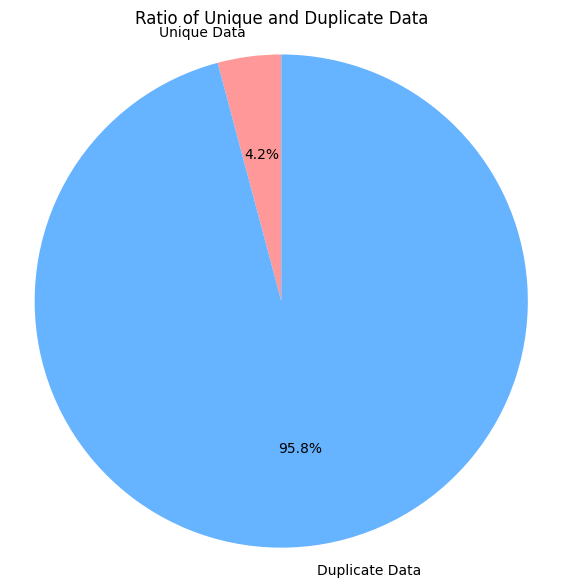

In [31]:
unique_count = data[~data.duplicated()].shape[0]
duplicate_count = data[data.duplicated()].shape[0]

labels = ['Unique Data', 'Duplicate Data']
sizes = [unique_count, duplicate_count]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Ratio of Unique and Duplicate Data')
plt.show()

In [32]:
# Check for duplicates in the DataFrame based on all columns
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                                                     Name             City  \
24      In South Banasree Project A Standard 2200 Squa...         Banasree   
25      Remarkable Flat Of 1600 Sq Ft Is Up For Rent I...      Mohammadpur   
26      Nice 1300 Sq. Ft. Flat Is Available To Rent In...  Bashundhara R-A   
27      Well-constructed And Nicely Planned Flat Of 12...      Mohammadpur   
28      1500 SQ FT flat is now Vacant to rent in South...          Khulshi   
...                                                   ...              ...   
106379  Ready apartment 650 SQ FT is now to Rent in Se...           Mirpur   
106380  At Rajuk Uttara Apartment Project, Check This ...           Uttara   
106381  Cozy 800 Square Feet Apartment Is For Rent At ...           Mirpur   
106382  A Flat With All Facilities Is Up For Rent At M...         Malibagh   
106383  A Well Constructed 750 Sq Ft Flat Is Ready For...           Mirpur   

            Region Property Type Size(sqft)  Be

In [33]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [34]:
Region_type = data['Region'].value_counts()
Region_type

Dhaka         3682
Chattogram     738
Name: Region, dtype: int64

In [ ]:
data['Region'] = pd.to_numeric(data['Region'], errors='coerce')

data = data[data['Region'] != 1600]

Region_type = data['Region'].value_counts()
print(Region_type)

Series([], Name: Region, dtype: int64)


In [35]:
Region_type = data['Region'].value_counts()
Region_type

Dhaka         3682
Chattogram     738
Name: Region, dtype: int64

In [36]:
Property_type = data['Property Type'].value_counts()
Property_type

Apartment    4376
Residence      44
Name: Property Type, dtype: int64

In [37]:
City_name = data['City'].value_counts()
City_name

Mirpur                    394
Mohammadpur               356
Uttara                    355
Bashundhara R-A           338
Gulshan                   240
                         ... 
Nasirabad                   1
32 No. Andarkilla Ward      1
Savar                       1
Ibrahimpur                  1
Shyampur                    1
Name: City, Length: 88, dtype: int64

# From here, we can see that in dhaka more than 90% houses are available for rent and a small portion of the houses are from Chittagong

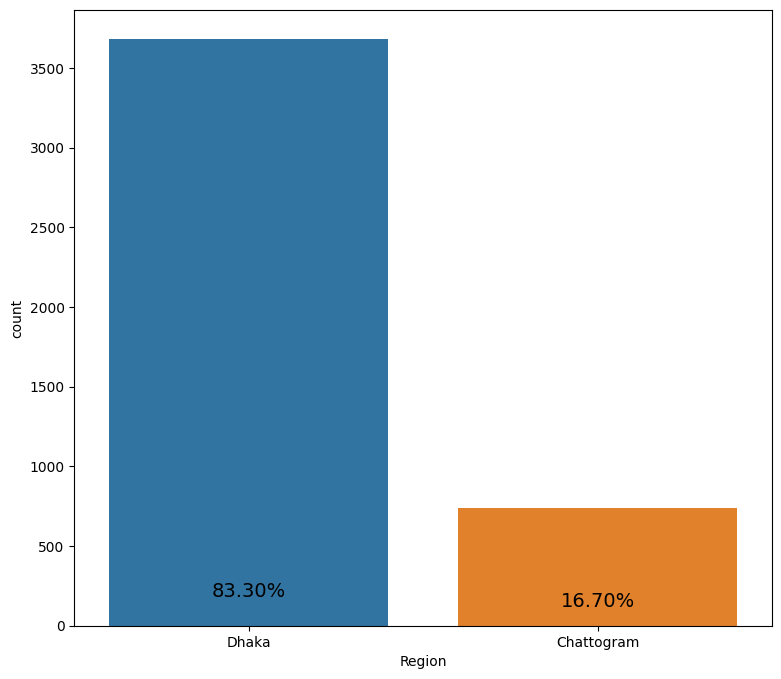

In [38]:
# Assuming 'type' is the column you want to visualize
sns.countplot(x='Region', data=data)

# Calculate the percentage and add it to the plot
Region_type = data['Region'].value_counts(normalize=True) * 100
for i in range(Region_type.shape[0]):
    num = Region_type.values[i]
    text = "{:0.2f}%".format(num)
    plt.text(i, num+100, text, ha="center", color="k", fontsize=14)

plt.show()

# Data Transformation and creating a new size catagory column

In [39]:
import re

# Remove commas from 'Size(sqft)' values
data['Size(sqft)'] = data['Size(sqft)'].str.replace(',', '')

# Convert 'Size(sqft)' column to integers
data['Size(sqft)'] = data['Size(sqft)'].astype(int)

# Define size ranges
size_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
size_bins = [int(bin) for bin in size_bins]
size_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000']

# Create a new column 'Size_Category' with size ranges
data['Size_Category'] = pd.cut(data['Size(sqft)'], bins=size_bins, labels=size_labels)

# Visualize Relationship between Price and Size Categories

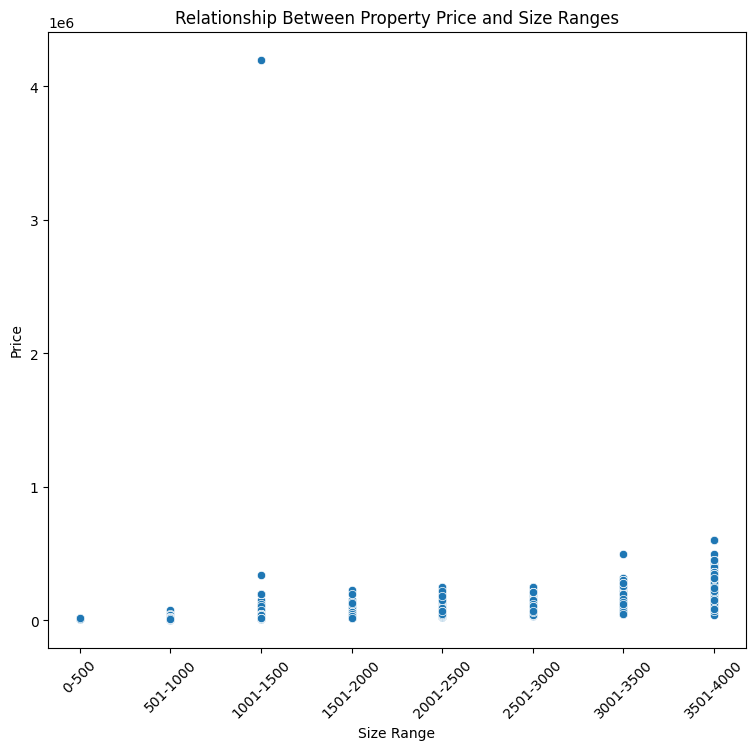

In [40]:
sns.scatterplot(x='Size_Category', y='Price', data=data)
plt.title("Relationship Between Property Price and Size Ranges")
plt.xlabel("Size Range")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between property price and number of bedrooms

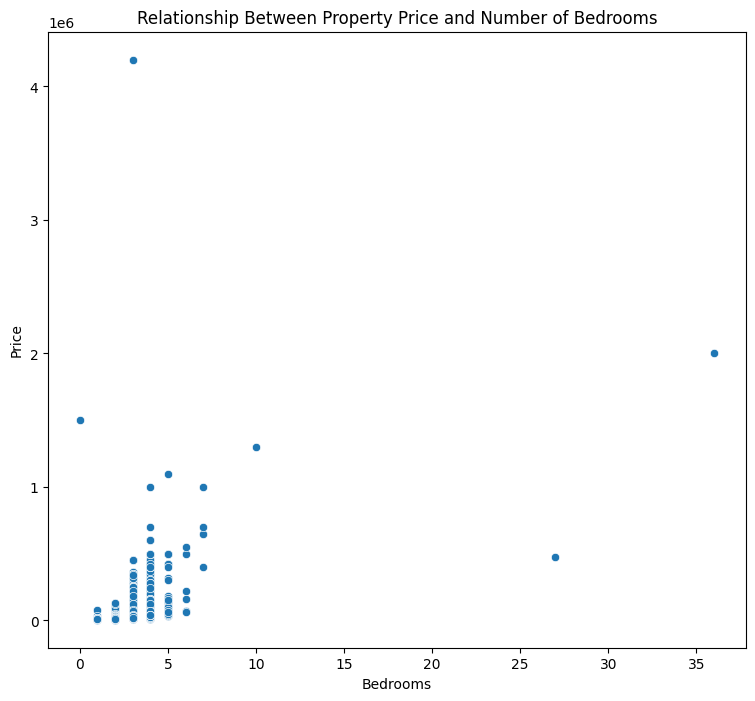

In [41]:
sns.scatterplot(x = "Bedrooms", y = "Price", data = data)
plt.title("Relationship Between Property Price and Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# Analyze the relationship between property price and number of bathrooms

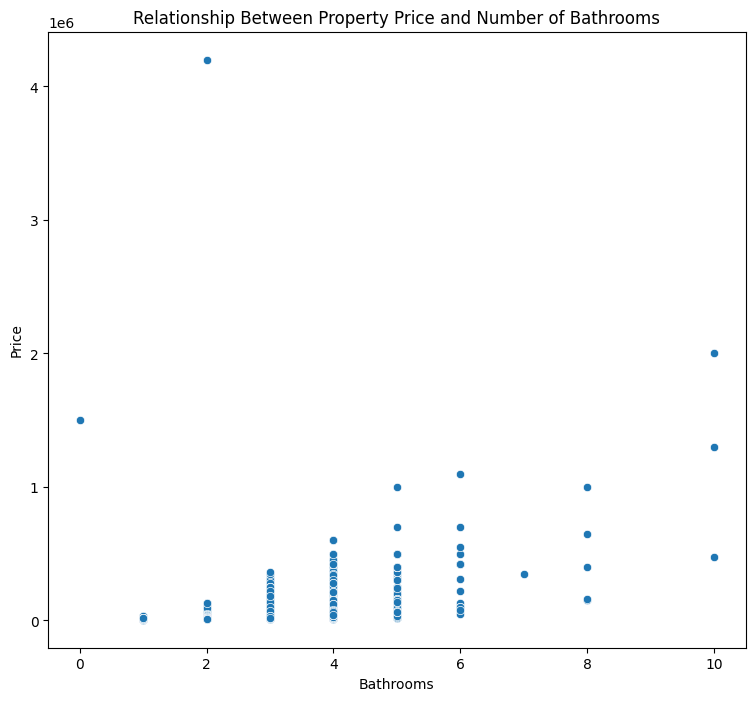

In [42]:
sns.scatterplot(x = "Bathrooms", y = "Price", data = data)
plt.title("Relationship Between Property Price and Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

# Let's Compare price between Dhaka and Chittagong region

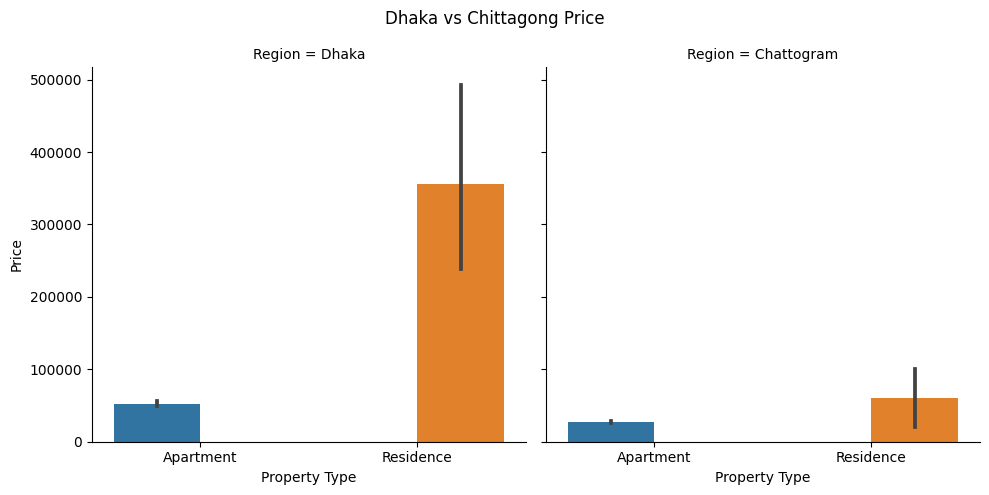

In [43]:
plt.rcParams['figure.figsize'] = (9,8)
sns.catplot(x = "Property Type", y = "Price", col = "Region", hue = "Property Type",
            data = data, kind = "bar")
plt.suptitle("Dhaka vs Chittagong Price")
plt.tight_layout()
plt.show()

# The graph shows the average price of apartments and residences in Dhaka and Chittagong regions. We can see that the average price difference between Dhaka and Chittagong is very high. Dhaka is way more expensive than Chittagong.

In [44]:
data.to_csv('cleaned_data_property_details_11_24_2023.csv', index=False)